## Kommentare füge ich noch hinzu! Erstmal nur der Code.
### Auch die Reihenfolge kann sich noch ändern
#### Wichtig ist, dass alle Zellen über einer Zelle ausgeführt werden müssen, damit die Zellen darunter funktionieren!
#### Außerdem, können die lambda-Methoden eine Weile dauern

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [2]:
boston_2018_data = pd.read_csv('/Users/aligulen/Desktop/DSML/Group Project/boston_2018.csv')
boston_2018_data.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber
5,2018-01-01 01:15:59,2018-01-01 01:17:21,31,186,Seaport Hotel - Congress St at Seaport Ln,Congress St at Northern Ave,1793,Subscriber
6,2018-01-01 01:35:37,2018-01-01 01:42:35,51,222,Washington St at Lenox St,Troy Boston,60,Subscriber
7,2018-01-01 01:35:46,2018-01-01 01:45:11,189,178,Kendall T,MIT Pacific St at Purrington St,371,Subscriber
8,2018-01-01 01:45:04,2018-01-01 01:53:40,108,176,Harvard University / SEAS Cruft-Pierce Halls a...,Lesley University,961,Subscriber
9,2018-01-01 01:56:58,2018-01-01 02:06:13,185,178,Third at Binney,MIT Pacific St at Purrington St,1286,Subscriber


In [3]:
len(boston_2018_data)-len(boston_2018_data.dropna())

0

In [4]:
boston_2018_data_clean = boston_2018_data.dropna(axis=0)
boston_2018_data_clean.head(1000000)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber
...,...,...,...,...,...,...,...,...
999995,2018-08-15 18:25:56.7200,2018-08-15 18:56:06.9810,35,32,Arch St at Franklin St,Landmark Center - Brookline Ave at Park Dr,838,Subscriber
999996,2018-08-15 18:25:55.7250,2018-08-15 18:32:33.6170,139,87,Dana Park,Harvard University Housing - 115 Putnam Ave at...,3189,Subscriber
999997,2018-08-15 18:25:58.2320,2018-08-15 18:32:30.2600,80,178,MIT Stata Center at Vassar St / Main St,MIT Pacific St at Purrington St,99,Subscriber
999998,2018-08-15 18:25:56.3940,2018-08-16 09:18:15.8990,52,36,Newbury St at Hereford St,Copley Square - Dartmouth St at Boylston St,3199,Subscriber


In [5]:
def clean_date(x):
    return x.split('.')[0]

boston_2018_data_clean['start_time'] = boston_2018_data_clean['start_time'].apply(lambda x: clean_date(x))
boston_2018_data_clean['end_time'] = boston_2018_data_clean['end_time'].apply(lambda x: clean_date(x))
boston_2018_data_clean.head(1000000)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber
...,...,...,...,...,...,...,...,...
999995,2018-08-15 18:25:56,2018-08-15 18:56:06,35,32,Arch St at Franklin St,Landmark Center - Brookline Ave at Park Dr,838,Subscriber
999996,2018-08-15 18:25:55,2018-08-15 18:32:33,139,87,Dana Park,Harvard University Housing - 115 Putnam Ave at...,3189,Subscriber
999997,2018-08-15 18:25:58,2018-08-15 18:32:30,80,178,MIT Stata Center at Vassar St / Main St,MIT Pacific St at Purrington St,99,Subscriber
999998,2018-08-15 18:25:56,2018-08-16 09:18:15,52,36,Newbury St at Hereford St,Copley Square - Dartmouth St at Boylston St,3199,Subscriber


In [6]:
def get_date(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date()

def get_weekday(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").weekday()

def get_hour(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour

def get_month(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S").month

In [7]:
boston_2018_data_clean.reset_index(drop=True)
boston_2018_data_clean['date'] = boston_2018_data_clean['start_time'].apply(lambda x: get_date(x))

In [8]:
boston_2018_data_clean['weekday'] = boston_2018_data_clean['start_time'].apply(lambda x: get_weekday(x))

In [9]:
boston_2018_data_clean['hour'] = boston_2018_data_clean['start_time'].apply(lambda x: get_hour(x))

In [10]:
boston_2018_data_clean['month'] = boston_2018_data_clean['start_time'].apply(lambda x: get_month(x))

In [11]:
boston_2018_data_clean.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,2018-01-01,0,0,1
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,2018-01-01,0,0,1
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,2018-01-01,0,0,1
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber,2018-01-01,0,0,1
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,2018-01-01,0,1,1


In [12]:
bike_stations = pd.read_csv('/Users/aligulen/Desktop/DSML/Group Project/DSML_Team_Viper-clean_and_prepare_data/current_bluebikes_stations.csv')
bike_stations.head(5)

,Last Updated,May 7th 2021,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Number,Name,Latitude,Longitude,District,Public,Total docks
1,W32006,160 Arsenal,42.36466403,-71.17569387,Watertown,Yes,11
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18
3,S32035,191 Beacon St,42.38032335,-71.10878613,Somerville,Yes,19
4,C32094,2 Hummingbird Lane at Olmsted Green,42.28887,-71.095003,Boston,Yes,17


In [13]:
len(bike_stations) - len(bike_stations.dropna())

0

In [14]:
bike_stations.columns = bike_stations.iloc[0]
bike_stations.drop(bike_stations.index[0])

,Number,Name,Latitude,Longitude,District,Public,Total docks
1,W32006,160 Arsenal,42.36466403,-71.17569387,Watertown,Yes,11
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18
3,S32035,191 Beacon St,42.38032335,-71.10878613,Somerville,Yes,19
4,C32094,2 Hummingbird Lane at Olmsted Green,42.28887,-71.095003,Boston,Yes,17
5,S32023,30 Dane St,42.38100143,-71.10402523,Somerville,Yes,15
...,...,...,...,...,...,...,...
368,N32006,West Newton Armory,42.34947178,-71.22000679,Newton,Yes,11
369,A32043,Western Ave at Richardson St,42.36178741,-71.14393111,Boston,Yes,19
370,B32059,Whittier St Health Center,42.33286288,-71.09218862,Boston,Yes,19
371,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,19


In [15]:
boston_2018_start_geodata = pd.merge(boston_2018_data_clean, bike_stations[['Name','Latitude', 'Longitude', 'District']], left_on="start_station_name", right_on="Name", how="left")
boston_2018_start_geodata = boston_2018_start_geodata.rename(columns = {'Latitude': 'latitude_start', 'Longitude': 'longitude_start', "District": "district_start"})
del boston_2018_start_geodata['Name']

boston_2018_trip_geodata = pd.merge(boston_2018_start_geodata, bike_stations[['Name','Latitude', 'Longitude', 'District']], left_on="end_station_name", right_on="Name", how="left")
boston_2018_trip_geodata = boston_2018_trip_geodata.rename(columns = {'Latitude': 'latitude_end', 'Longitude': 'longitude_end', "District": "district_end"})
del boston_2018_trip_geodata['Name']

boston_2018_trip_geodata.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month,latitude_start,longitude_start,district_start,latitude_end,longitude_end,district_end
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,2018-01-01,0,0,1,42.3595732,-71.10129476,Cambridge,42.3625,-71.08822,Cambridge
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,2018-01-01,0,0,1,42.37971603,-71.09391332,Somerville,42.37119728,-71.09759867,Cambridge
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,2018-01-01,0,0,1,42.34807412,-71.07657015,Boston,42.366426,-71.105495,Cambridge
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber,2018-01-01,0,0,1,NaN,NaN,NaN,42.36264779,-71.10006094,Cambridge
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,2018-01-01,0,1,1,42.345392,-71.069616,Boston,42.34366582,-71.08582377,Boston


In [16]:
boston_2018_trip_geodata_clean = boston_2018_trip_geodata.dropna(axis=0)
boston_2018_trip_geodata_clean.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month,latitude_start,longitude_start,district_start,latitude_end,longitude_end,district_end
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,2018-01-01,0,0,1,42.3595732,-71.10129476,Cambridge,42.3625,-71.08822,Cambridge
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,2018-01-01,0,0,1,42.37971603,-71.09391332,Somerville,42.37119728,-71.09759867,Cambridge
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,2018-01-01,0,0,1,42.34807412,-71.07657015,Boston,42.366426,-71.105495,Cambridge
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,2018-01-01,0,1,1,42.345392,-71.069616,Boston,42.34366582,-71.08582377,Boston
5,2018-01-01 01:15:59,2018-01-01 01:17:21,31,186,Seaport Hotel - Congress St at Seaport Ln,Congress St at Northern Ave,1793,Subscriber,2018-01-01,0,1,1,42.34881026,-71.04167744,Boston,42.3481,-71.03764,Boston
6,2018-01-01 01:35:37,2018-01-01 01:42:35,51,222,Washington St at Lenox St,Troy Boston,60,Subscriber,2018-01-01,0,1,1,42.33509899,-71.07903779,Boston,42.343749,-71.062256,Boston
7,2018-01-01 01:35:46,2018-01-01 01:45:11,189,178,Kendall T,MIT Pacific St at Purrington St,371,Subscriber,2018-01-01,0,1,1,42.36242784,-71.08495474,Cambridge,42.3595732,-71.10129476,Cambridge
8,2018-01-01 01:45:04,2018-01-01 01:53:40,108,176,Harvard University / SEAS Cruft-Pierce Halls a...,Lesley University,961,Subscriber,2018-01-01,0,1,1,42.377945,-71.116865,Cambridge,42.38674802,-71.11901879,Cambridge
9,2018-01-01 01:56:58,2018-01-01 02:06:13,185,178,Third at Binney,MIT Pacific St at Purrington St,1286,Subscriber,2018-01-01,0,1,1,42.36544486,-71.08277142,Cambridge,42.3595732,-71.10129476,Cambridge
10,2018-01-01 02:01:28,2018-01-01 02:08:09,95,90,Cambridge St - at Columbia St / Webster Ave,Lechmere Station at Cambridge St / First St,1142,Subscriber,2018-01-01,0,2,1,42.372969,-71.094445,Cambridge,42.370677,-71.076529,Cambridge


TEMPORAL DEMAND PATTERNS AND SEASONALITY

In [17]:
#create a column with weekday names 
weeday_dict = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}

boston_2018_data_clean["Weekday_name"] = boston_2018_data_clean["weekday"].apply(lambda x: weeday_dict[x])

In [18]:
boston_2018_data_clean

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,weekday,hour,month,Weekday_name
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,2018-01-01,0,0,1,Mon
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,2018-01-01,0,0,1,Mon
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,2018-01-01,0,0,1,Mon
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber,2018-01-01,0,0,1,Mon
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,2018-01-01,0,1,1,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767801,2018-12-31 23:48:46,2018-12-31 23:56:55,19,179,Park Dr at Buswell St,MIT Vassar St,4440,Subscriber,2018-12-31,0,23,12,Mon
1767802,2018-12-31 23:48:58,2019-01-01 03:13:49,40,40,Lewis Wharf at Atlantic Ave,Lewis Wharf at Atlantic Ave,2117,Subscriber,2018-12-31,0,23,12,Mon
1767803,2018-12-31 23:51:19,2019-01-01 00:17:15,68,68,Central Square at Mass Ave / Essex St,Central Square at Mass Ave / Essex St,3725,Subscriber,2018-12-31,0,23,12,Mon
1767804,2018-12-31 23:54:16,2018-12-31 23:57:17,352,36,Ring Rd,Copley Square - Dartmouth St at Boylston St,3605,Customer,2018-12-31,0,23,12,Mon


In [19]:
#create a column with month names
month_dict = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

boston_2018_data_clean["month_name"] = boston_2018_data_clean["month"].apply(lambda x: month_dict[x])

In [20]:
#create a new column with an ascending index of each row
Bike_anzahl=boston_2018_data_clean.index

boston_2018_data_clean["Bike_Anzahl"]= Bike_anzahl

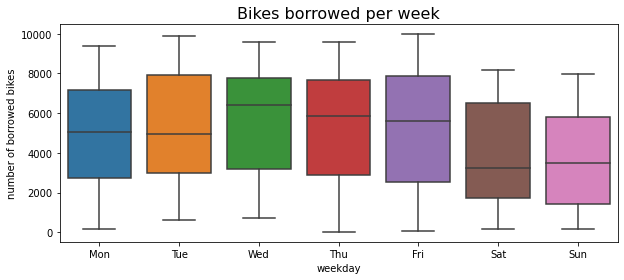

In [21]:
#create a boxplot of borrowed bikes per week
boston_tempered_weekday = boston_2018_data_clean.groupby(["date","Weekday_name"])["Bike_Anzahl"].nunique()
boston_tempered_weekday= pd.DataFrame(boston_tempered_weekday)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=boston_tempered_weekday.index.get_level_values(1), y=boston_tempered_weekday["Bike_Anzahl"],ax=ax)
ax.set_title("Bikes borrowed per week",fontsize=16)
plt.xlabel('weekday')
plt.ylabel('number of borrowed bikes')
plt.show()

english version<<<<< soon
Am Boxplot-Diagramm sieht man, dass die wöchentliche Anzahl der ausgeliehenen Fahrräder einheitlch verteilt ist. Lediglich am Wocheende, liegen die Mediana unter dem Niveau der Werktage. Dies kann damit erklärt werden, dass am Wochende weniger Leute arbeiten und so keine Fahrräder gebraucht werden.

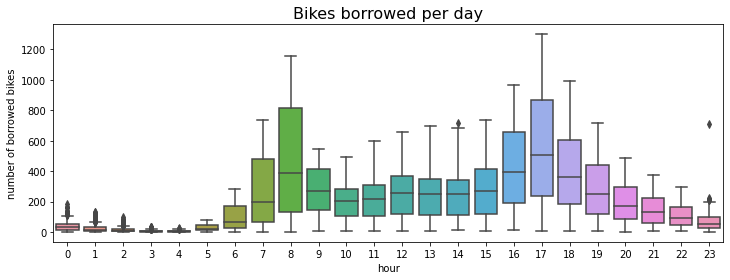

In [22]:
#create a boxplot of borrowed bikes per day
boston_tempered_hour = boston_2018_data_clean.groupby(["date","hour"])["Bike_Anzahl"].nunique()
boston_tempered_hour= pd.DataFrame(boston_tempered_hour)
fig,ax = plt.subplots(figsize=(12,4)) 

sns.boxplot(x=boston_tempered_hour.index.get_level_values(1), y=boston_tempered_hour["Bike_Anzahl"],ax=ax)
ax.set_title("Bikes borrowed per day",fontsize=16)
plt.ylabel('number of borrowed bikes')
plt.show()

english version soon<<<<
Am Boxplot-Diagramm der ausgeliehenen Fahrräder pro Tag wird deutlich, dass wir die beiden Hochpunkte um 8 und 17 Uhr haben. Dies sind die Zeiten wo Leute zur Arbeit fahren bzw. davon zurückkehren. Deutlich wird also, dass ein großteil die Fahrräder nutzt, um zur Arbeit zu gelangen. Von 0 bis 6 Uhr liegt die Zahl ausgeliehner Fahräder weit unter 100, da in diesen Zeiten die Nachtruhe herrscht. Genauso sieht man dass sich die Anzahl der Fahrräder in Richtung Mitternacht immer weiter abnimmt.

In [23]:
#create a column with index 1 in every row
month_dict2 = {1:"1",2:"1",3:"1",4:"1",5:"1",6:"1",7:"1",8:"1",9:"1",10:"1",11:"1",12:"1"}

boston_2018_data_clean["Index"] = boston_2018_data_clean["month"].apply(lambda x: month_dict2[x])


In [24]:
#calculate the number of borrowed bikes for every month
Jan = boston_2018_data_clean[boston_2018_data_clean["month"]==1].groupby("Index").count()
Feb = boston_2018_data_clean[boston_2018_data_clean["month"]==2].groupby("Index").count()
Mar = boston_2018_data_clean[boston_2018_data_clean["month"]==3].groupby("Index").count()
Apr = boston_2018_data_clean[boston_2018_data_clean["month"]==4].groupby("Index").count()
May = boston_2018_data_clean[boston_2018_data_clean["month"]==5].groupby("Index").count()
Jun = boston_2018_data_clean[boston_2018_data_clean["month"]==6].groupby("Index").count()
Jul = boston_2018_data_clean[boston_2018_data_clean["month"]==7].groupby("Index").count()
Aug = boston_2018_data_clean[boston_2018_data_clean["month"]==8].groupby("Index").count()
Sep = boston_2018_data_clean[boston_2018_data_clean["month"]==9].groupby("Index").count()
Oct = boston_2018_data_clean[boston_2018_data_clean["month"]==10].groupby("Index").count()
Nov = boston_2018_data_clean[boston_2018_data_clean["month"]==11].groupby("Index").count()
Dec = boston_2018_data_clean[boston_2018_data_clean["month"]==12].groupby("Index").count()

In [25]:
#output the claculated table
Data = {"Jan": Jan['month'],
      "Feb": Feb['month'],
       "Mar": Mar['month'],
        "Apr": Apr['month'],
        "May": May['month'],
        "Jun": Jun['month'],
        "Jul": Jul['month'],
        "Aug": Aug['month'],
        "Sep": Sep['month'],
        "Oct": Oct['month'],
        "Nov": Nov['month'],
        "Dec": Dec['month']
       }

Year = pd.DataFrame(Data)
print(Year)

         Jan    Feb    Mar    Apr     May     Jun     Jul     Aug     Sep  \
Index                                                                       
1      40932  62817  62985  98194  178865  205359  242916  236076  236182   

          Oct     Nov    Dec  
Index                         
1      200100  121419  81961  


In [26]:
#create a bar chart
datayear = {'month': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec'],
        'quantity': [40932,62817,62985,98194,178865,205359,242916,236076,236182,200100,121419,81961]
        }

Year2 = pd.DataFrame(Year2)

NameError: name 'Year2' is not defined

In [ ]:
ax=Year2.plot.bar(x='month', y='quantity', rot=0, figsize=(14,6))
ax.set_title("Bikes borrowed in year 2018",fontsize=16)
plt.ylabel('number of borrowed bikes', fontsize=14)
plt.xlabel('month', fontsize=14)
plt.show()

english version soon<<<< Am Digramm wird deutlich, dass vor allem in den Monaten mit höheren Temperaturen, also von May bis Oct, die meisten Fahrräder ausgeliehen werden. 

In [ ]:
#create a bar chart for seasons
data_season = {'season': ['Spring','Summer','Autumn','Winter'],
        'quantity': [340044,684351,557701,185710]
        }

season = pd.DataFrame(data_season)

In [ ]:
ax=season.plot.bar(x='season', y='quantity', rot=0, figsize=(14,6))
ax.set_title("Bikes borrowed in seasons",fontsize=16)
plt.ylabel('number of borrowed bikes', fontsize=14)
plt.xlabel('season', fontsize=14)
plt.show()

english version soon<<< Deutlich wird eine hohe Nutzung der Fahrradflotte rund um den Monaten mit hohen bzw. angenehmen Temperaturen.